2.1 Gaussian Classifier

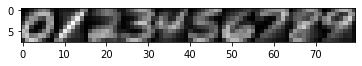

In [112]:
'''
Question 2.0 Skeleton Code

Here you should load the data and plot
the means for each of the digit classes.
'''

import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt

def plot_means(train_data, train_labels):
    means = []
    for i in range(0, 10):
        i_digits = data.get_digits_by_label(train_data, train_labels, i)
        # Compute mean of class i
        # [0, 1, 0, 0, 1 ... ]in total 700 rows each with 64 columns
        #print(str(i_digits.shape)+","+str(type(i_digits)))
        i_digits = np.mean(i_digits, axis=0)
        #print("i_digits:", i_digits.shape)
        means.append( i_digits.reshape((8,8)) )

    # Plot all means on same axis
    #print("means: ",means[0].shape)
    all_concat = np.concatenate(means, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

if __name__ == '__main__':
    train_data, train_labels, _, _ = data.load_all_data_from_zip('a4digits.zip', 'data')
    plot_means(train_data, train_labels)

2.1.1 Plot the log-diagonal of each covariance matrix side by side


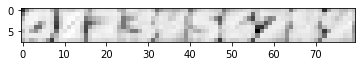

In [117]:
'''
Question 2.1 Skeleton Code

Here you should implement and evaluate the Conditional Gaussian classifier.
'''

import data
import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt
np.random.seed(0)

def compute_mean_mles(train_data, train_labels):
    '''
    Compute the mean estimate for each digit class

    Should return a numpy array of size (10,64)
    The ith row will correspond to the mean estimate for digit class i
    '''
    # Compute means
    tmp = []
    for i in range(10):
        i_digits = data.get_digits_by_label(train_data, train_labels, i)
        tmp.append( np.mean(i_digits, axis=0) )
    # Create array from list "tmp"
    means = np.array(tmp) # (10,64)
    return means

def compute_sigma_mles(train_data, train_labels):
    '''
    Compute the covariance estimate for each digit class

    Should return a three dimensional numpy array of shape (10, 64, 64)
    consisting of a covariance matrix for each digit class 
    '''
    covariances = np.zeros((10, 64, 64))
    # Compute covariances
    means = compute_mean_mles(train_data, train_labels).transpose() # (10,64) -> (64,10)
    for i in range(10):
        i_digits = data.get_digits_by_label(train_data, train_labels, i) # (700,64)
        ### First try
        X = i_digits.transpose()
        mu = means[:,i]
        mu = mu.reshape(mu.shape[0],1)
        N = X.shape[1]
        covariances[i,:,:] = np.matmul( (X - mu),(X - mu).transpose() )/ N
        
        ### Third try
        # Sanity check
        #print("built-in numpy:")
        #z = np.cov(i_digits.transpose())
        #print(z.shape)
        #print(z[0,:])
    #print(covariances.shape)
    #print(covariances[0,:,:])
    return covariances

def plot_cov_diagonal(covariances):
    # Plot the log-diagonal of each covariance matrix side by side
    print("2.1.1 Plot the log-diagonal of each covariance matrix side by side")
    diag = []
    for i in range(10):
        cov_diag = np.diag(covariances[i])
        log_diag = np.log(cov_diag)
        diag.append( log_diag.reshape((8,8)) )
                
    all_concat = np.concatenate(diag, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

def generative_likelihood(digits, means, covariances):
    '''
    Compute the generative log-likelihood:
        log p(x|y,mu,Sigma)

    Should return an n x 10 numpy array 
    '''
    
    return None

def conditional_likelihood(digits, means, covariances):
    '''
    Compute the conditional likelihood:

        log p(y|x, mu, Sigma)

    This should be a numpy array of shape (n, 10)
    Where n is the number of datapoints and 10 corresponds to each digit class
    '''
    return None

def avg_conditional_likelihood(digits, labels, means, covariances):
    '''
    Compute the average conditional likelihood over the true class labels

        AVG( log p(y_i|x_i, mu, Sigma) )

    i.e. the average log likelihood that the model assigns to the correct class label
    '''
    cond_likelihood = conditional_likelihood(digits, means, covariances)

    # Compute as described above and return
    return None

def classify_data(digits, means, covariances):
    '''
    Classify new points by taking the most likely posterior class
    '''
    cond_likelihood = conditional_likelihood(digits, means, covariances)
    # Compute and return the most likely class
    pass

def main():
    train_data, train_labels, test_data, test_labels = data.load_all_data('data')

    # Fit the model
    means = compute_mean_mles(train_data, train_labels)
    covariances = compute_sigma_mles(train_data, train_labels)
    plot_cov_diagonal(covariances)

    # Evaluation

if __name__ == '__main__':
    main()